In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'DOH COVID Data Drop_ 20201031 - 04 Case Information.csv')
data

,CaseCode,Age,AgeGroup,Sex,DateSpecimen,DateResultRelease,DateRepConf,DateDied,DateRecover,RemovalType,...,ProvRes,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,Quarantined,DateOnset,Pregnanttab,ValidationStatus
0,C642447,25.0,25 to 29,MALE,2020-07-14,2020-07-15,2020-07-19,NaN,NaN,RECOVERED,...,COTABATO CITY (NOT A PROVINCE),NaN,NaN,NaN,NaN,RECOVERED,NO,NaN,NaN,"Removal Type is ""Recovered"", but no Recovered ..."
1,C919481,54.0,50 to 54,MALE,2020-07-27,2020-07-30,2020-08-03,NaN,NaN,RECOVERED,...,NaN,NaN,NaN,NaN,NaN,RECOVERED,NO,NaN,NaN,"Health Status is ""Recovered"", but no Date Reco..."
2,C378726,50.0,50 to 54,FEMALE,2020-07-18,2020-07-19,2020-07-24,NaN,NaN,RECOVERED,...,NaN,NaN,NaN,NaN,NaN,RECOVERED,NO,NaN,NO,"Health Status is ""Recovered"", but no Date Reco..."
3,C556553,30.0,30 to 34,FEMALE,2020-05-27,2020-05-27,2020-05-31,NaN,NaN,RECOVERED,...,NaN,NaN,NaN,NaN,NaN,RECOVERED,NO,NaN,NO,"Removal Type is ""Recovered"", but no Recovered ..."
4,C210854,33.0,30 to 34,MALE,2020-07-21,2020-07-24,2020-07-28,NaN,NaN,RECOVERED,...,NaN,NaN,NaN,NaN,NaN,RECOVERED,NO,NaN,NaN,"Health Status is ""Recovered"", but no Date Reco..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380724,C881229,29.0,25 to 29,MALE,2020-09-09,2020-09-13,2020-09-16,NaN,2020-09-24,RECOVERED,...,ROMBLON,CALATRAVA,PH175904000,BALOGO,PH175904001,RECOVERED,YES,NaN,NaN,NaN
380725,C591169,22.0,20 to 24,MALE,2020-09-09,2020-09-13,2020-09-16,NaN,2020-09-24,RECOVERED,...,ROMBLON,CALATRAVA,PH175904000,BALOGO,PH175904001,RECOVERED,YES,NaN,NaN,NaN
380726,C325398,27.0,25 to 29,FEMALE,2020-09-09,2020-09-13,2020-09-16,NaN,2020-09-24,RECOVERED,...,ROMBLON,CALATRAVA,PH175904000,BALOGO,PH175904001,RECOVERED,YES,NaN,NO,Age or Birthdate is Invalid
380727,C768847,46.0,45 to 49,FEMALE,2020-08-24,2020-08-28,2020-08-30,NaN,2020-09-07,RECOVERED,...,ROMBLON,SANTA MARIA (IMELDA),PH175917000,NaN,NaN,RECOVERED,YES,2020-08-20,NO,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380729 entries, 0 to 380728
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CaseCode           380729 non-null  object 
 1   Age                378546 non-null  float64
 2   AgeGroup           378546 non-null  object 
 3   Sex                380729 non-null  object 
 4   DateSpecimen       318641 non-null  object 
 5   DateResultRelease  319409 non-null  object 
 6   DateRepConf        380729 non-null  object 
 7   DateDied           7155 non-null    object 
 8   DateRecover        91993 non-null   object 
 9   RemovalType        338267 non-null  object 
 10  Admitted           380579 non-null  object 
 11  RegionRes          377056 non-null  object 
 12  ProvRes            355798 non-null  object 
 13  CityMunRes         345275 non-null  object 
 14  CityMuniPSGC       345275 non-null  object 
 15  BarangayRes        151373 non-null  object 
 16  Ba

In [4]:
df = data.drop('CaseCode', axis=1)
df = df.drop(df.loc[:,'AgeGroup':'Sex'].columns, axis=1)
df = df.drop(df.loc[:, 'DateResultRelease':'Admitted'].columns, axis=1)
df = df.drop('ProvRes', axis=1)
df = df.drop(df.loc[:, 'CityMuniPSGC':'BarangayPSGC'].columns, axis=1)
df = df.drop(df.loc[:, 'DateOnset':'ValidationStatus'].columns, axis=1)
df

,Age,DateSpecimen,RegionRes,CityMunRes,HealthStatus,Quarantined
0,25.0,2020-07-14,Region XII: SOCCSKSARGEN,NaN,RECOVERED,NO
1,54.0,2020-07-27,NaN,NaN,RECOVERED,NO
2,50.0,2020-07-18,ROF,NaN,RECOVERED,NO
3,30.0,2020-05-27,NCR,NaN,RECOVERED,NO
4,33.0,2020-07-21,NCR,NaN,RECOVERED,NO
...,...,...,...,...,...,...
380724,29.0,2020-09-09,Region IV-B: MIMAROPA,CALATRAVA,RECOVERED,YES
380725,22.0,2020-09-09,Region IV-B: MIMAROPA,CALATRAVA,RECOVERED,YES
380726,27.0,2020-09-09,Region IV-B: MIMAROPA,CALATRAVA,RECOVERED,YES
380727,46.0,2020-08-24,Region IV-B: MIMAROPA,SANTA MARIA (IMELDA),RECOVERED,YES


In [5]:
titles = list(df.columns)
titles

['Age',
 'DateSpecimen',
 'RegionRes',
 'CityMunRes',
 'HealthStatus',
 'Quarantined']

In [6]:
titles[4], titles[5] = titles[5], titles[4]
titles[2], titles[3] = titles[3], titles[2]
titles

['Age',
 'DateSpecimen',
 'CityMunRes',
 'RegionRes',
 'Quarantined',
 'HealthStatus']

In [7]:
df = df[titles]
df

,Age,DateSpecimen,CityMunRes,RegionRes,Quarantined,HealthStatus
0,25.0,2020-07-14,NaN,Region XII: SOCCSKSARGEN,NO,RECOVERED
1,54.0,2020-07-27,NaN,NaN,NO,RECOVERED
2,50.0,2020-07-18,NaN,ROF,NO,RECOVERED
3,30.0,2020-05-27,NaN,NCR,NO,RECOVERED
4,33.0,2020-07-21,NaN,NCR,NO,RECOVERED
...,...,...,...,...,...,...
380724,29.0,2020-09-09,CALATRAVA,Region IV-B: MIMAROPA,YES,RECOVERED
380725,22.0,2020-09-09,CALATRAVA,Region IV-B: MIMAROPA,YES,RECOVERED
380726,27.0,2020-09-09,CALATRAVA,Region IV-B: MIMAROPA,YES,RECOVERED
380727,46.0,2020-08-24,SANTA MARIA (IMELDA),Region IV-B: MIMAROPA,YES,RECOVERED


In [8]:
start_date = '2020-07-10'
end_date = '2020-08-10'

df = df.loc[df['RegionRes'] == 'NCR']
df = df.loc[(df['DateSpecimen'] >= start_date) & ((df['DateSpecimen'] <= end_date))]
df

,Age,DateSpecimen,CityMunRes,RegionRes,Quarantined,HealthStatus
4,33.0,2020-07-21,NaN,NCR,NO,RECOVERED
9,49.0,2020-07-29,CITY OF MANILA,NCR,NO,RECOVERED
12,NaN,2020-07-14,NaN,NCR,NO,RECOVERED
13,34.0,2020-07-28,CALOOCAN CITY,NCR,NO,RECOVERED
14,74.0,2020-07-25,QUEZON CITY,NCR,NO,RECOVERED
...,...,...,...,...,...,...
375886,66.0,2020-08-09,TAGUIG CITY,NCR,NO,RECOVERED
375888,30.0,2020-07-11,TAGUIG CITY,NCR,NO,RECOVERED
375895,40.0,2020-07-28,TAGUIG CITY,NCR,YES,RECOVERED
375927,42.0,2020-08-05,TAGUIG CITY,NCR,NO,DIED


In [9]:
#Cities in NCR
cities = df['CityMunRes'].unique().tolist()

cities

[nan,
 'CITY OF MANILA',
 'CALOOCAN CITY',
 'QUEZON CITY',
 'CITY OF MAKATI',
 'CITY OF MUNTINLUPA',
 'CITY OF MARIKINA',
 'CITY OF NAVOTAS',
 'CITY OF PASIG',
 'CITY OF SAN JUAN',
 'PASAY CITY',
 'CITY OF PARAÑAQUE',
 'CITY OF MANDALUYONG',
 'CITY OF LAS PIÑAS',
 'CITY OF MALABON',
 'CITY OF VALENZUELA',
 'TAGUIG CITY',
 'PATEROS']

In [10]:
hpStats = df['HealthStatus'].unique().tolist()
hpStats

['RECOVERED', 'DIED', 'CRITICAL', 'SEVERE', 'MILD', 'ASYMPTOMATIC']

In [11]:
df = df.reset_index(drop=True)
df['HealthStatus'].replace(to_replace=['MILD','SEVERE','ASYMPTOMATIC','CRITICAL'],value='SICK',inplace=True)
hpStats = df['HealthStatus'].unique().tolist()

hpStats

['RECOVERED', 'DIED', 'SICK']

In [12]:
df = df.dropna()
df = df.reset_index(drop=True)
df

,Age,DateSpecimen,CityMunRes,RegionRes,Quarantined,HealthStatus
0,49.0,2020-07-29,CITY OF MANILA,NCR,NO,RECOVERED
1,34.0,2020-07-28,CALOOCAN CITY,NCR,NO,RECOVERED
2,74.0,2020-07-25,QUEZON CITY,NCR,NO,RECOVERED
3,75.0,2020-07-28,CITY OF MAKATI,NCR,NO,RECOVERED
4,34.0,2020-08-10,CITY OF MANILA,NCR,YES,RECOVERED
...,...,...,...,...,...,...
42799,66.0,2020-08-09,TAGUIG CITY,NCR,NO,RECOVERED
42800,30.0,2020-07-11,TAGUIG CITY,NCR,NO,RECOVERED
42801,40.0,2020-07-28,TAGUIG CITY,NCR,YES,RECOVERED
42802,42.0,2020-08-05,TAGUIG CITY,NCR,NO,DIED


In [13]:
df['DateSpecimen'] = pd.to_datetime(df['DateSpecimen'], format='%Y-%m-%d')
df

,Age,DateSpecimen,CityMunRes,RegionRes,Quarantined,HealthStatus
0,49.0,2020-07-29,CITY OF MANILA,NCR,NO,RECOVERED
1,34.0,2020-07-28,CALOOCAN CITY,NCR,NO,RECOVERED
2,74.0,2020-07-25,QUEZON CITY,NCR,NO,RECOVERED
3,75.0,2020-07-28,CITY OF MAKATI,NCR,NO,RECOVERED
4,34.0,2020-08-10,CITY OF MANILA,NCR,YES,RECOVERED
...,...,...,...,...,...,...
42799,66.0,2020-08-09,TAGUIG CITY,NCR,NO,RECOVERED
42800,30.0,2020-07-11,TAGUIG CITY,NCR,NO,RECOVERED
42801,40.0,2020-07-28,TAGUIG CITY,NCR,YES,RECOVERED
42802,42.0,2020-08-05,TAGUIG CITY,NCR,NO,DIED


In [14]:
df['DateSpecimen'] = df['DateSpecimen'].dt.strftime('%m/%d/%Y')
df

,Age,DateSpecimen,CityMunRes,RegionRes,Quarantined,HealthStatus
0,49.0,07/29/2020,CITY OF MANILA,NCR,NO,RECOVERED
1,34.0,07/28/2020,CALOOCAN CITY,NCR,NO,RECOVERED
2,74.0,07/25/2020,QUEZON CITY,NCR,NO,RECOVERED
3,75.0,07/28/2020,CITY OF MAKATI,NCR,NO,RECOVERED
4,34.0,08/10/2020,CITY OF MANILA,NCR,YES,RECOVERED
...,...,...,...,...,...,...
42799,66.0,08/09/2020,TAGUIG CITY,NCR,NO,RECOVERED
42800,30.0,07/11/2020,TAGUIG CITY,NCR,NO,RECOVERED
42801,40.0,07/28/2020,TAGUIG CITY,NCR,YES,RECOVERED
42802,42.0,08/05/2020,TAGUIG CITY,NCR,NO,DIED


In [15]:
c1 = df.loc[df['CityMunRes'] == 'QUEZON CITY']
c2 = df.loc[df['CityMunRes'] == 'CITY OF MAKATI']

c1 = c1.reset_index(drop=True)
c2 = c2.reset_index(drop=True)

In [16]:
c1

,Age,DateSpecimen,CityMunRes,RegionRes,Quarantined,HealthStatus
0,74.0,07/25/2020,QUEZON CITY,NCR,NO,RECOVERED
1,24.0,07/25/2020,QUEZON CITY,NCR,NO,RECOVERED
2,45.0,07/22/2020,QUEZON CITY,NCR,NO,RECOVERED
3,20.0,07/21/2020,QUEZON CITY,NCR,NO,RECOVERED
4,33.0,07/28/2020,QUEZON CITY,NCR,NO,RECOVERED
...,...,...,...,...,...,...
8364,22.0,07/10/2020,QUEZON CITY,NCR,NO,RECOVERED
8365,16.0,07/22/2020,QUEZON CITY,NCR,YES,RECOVERED
8366,34.0,07/21/2020,QUEZON CITY,NCR,NO,RECOVERED
8367,12.0,07/22/2020,QUEZON CITY,NCR,YES,RECOVERED


In [17]:
c2

,Age,DateSpecimen,CityMunRes,RegionRes,Quarantined,HealthStatus
0,75.0,07/28/2020,CITY OF MAKATI,NCR,NO,RECOVERED
1,36.0,07/12/2020,CITY OF MAKATI,NCR,NO,RECOVERED
2,12.0,07/27/2020,CITY OF MAKATI,NCR,NO,RECOVERED
3,50.0,07/27/2020,CITY OF MAKATI,NCR,NO,RECOVERED
4,8.0,07/28/2020,CITY OF MAKATI,NCR,NO,RECOVERED
...,...,...,...,...,...,...
2814,32.0,08/10/2020,CITY OF MAKATI,NCR,YES,RECOVERED
2815,24.0,08/10/2020,CITY OF MAKATI,NCR,NO,RECOVERED
2816,29.0,08/09/2020,CITY OF MAKATI,NCR,NO,RECOVERED
2817,30.0,08/10/2020,CITY OF MAKATI,NCR,NO,RECOVERED


In [18]:
c1['HealthStatus'] = c1['HealthStatus'].map({'RECOVERED':1,'SICK':2,'DIED':3}) #Classifiers
c2['HealthStatus'] = c2['HealthStatus'].map({'RECOVERED':1,'SICK':2,'DIED':3})
c1['Quarantined'] = c1['Quarantined'].map({'YES':0, 'NO':1})
c2['Quarantined'] = c2['Quarantined'].map({'YES':0, 'NO':1})

In [19]:
c1

,Age,DateSpecimen,CityMunRes,RegionRes,Quarantined,HealthStatus
0,74.0,07/25/2020,QUEZON CITY,NCR,1,1
1,24.0,07/25/2020,QUEZON CITY,NCR,1,1
2,45.0,07/22/2020,QUEZON CITY,NCR,1,1
3,20.0,07/21/2020,QUEZON CITY,NCR,1,1
4,33.0,07/28/2020,QUEZON CITY,NCR,1,1
...,...,...,...,...,...,...
8364,22.0,07/10/2020,QUEZON CITY,NCR,1,1
8365,16.0,07/22/2020,QUEZON CITY,NCR,0,1
8366,34.0,07/21/2020,QUEZON CITY,NCR,1,1
8367,12.0,07/22/2020,QUEZON CITY,NCR,0,1


In [20]:
c1[['HealthStatus','Quarantined']] = c1[['HealthStatus','Quarantined']].apply(pd.to_numeric)
c2[['HealthStatus','Quarantined']] = c2[['HealthStatus','Quarantined']].apply(pd.to_numeric)

In [21]:
c1.corr()

,Age,Quarantined,HealthStatus
Age,1.000000,-0.014902,0.206436
Quarantined,-0.014902,1.000000,-0.083533
HealthStatus,0.206436,-0.083533,1.000000


In [22]:
c1x = c1[['Age','Quarantined']] #values that will determine y
c2x 
c1y = c1['HealthStatus'] #patient is recovered, sick, or dead

In [24]:
clf = LogisticRegression()

In [23]:
c1x_train, c1x_test, c1y_train, c1y_test = train_test_split(c1x, c1y, test_size = 0.2) #
c1x_train, c1x_test, c1y_train, c1y_test = train_test_split(c1x, c1y, test_size = 0.2) #Makati

In [25]:
clf1 = clf.fit(c1x_train,c1y_train)

In [83]:
y_pred = clf.predict(x_test) #if |age = 84, dead

In [27]:
matrix = metrics.confusion_matrix(y_test, y_pred)
matrix

array([[545,   0,   0],
       [  5,   0,   0],
       [ 13,   0,   1]], dtype=int64)

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.97      1.00      0.98       545
           2       0.00      0.00      0.00         5
           3       1.00      0.07      0.13        14

    accuracy                           0.97       564
   macro avg       0.66      0.36      0.37       564
weighted avg       0.96      0.97      0.95       564



In [29]:
import seaborn as sns

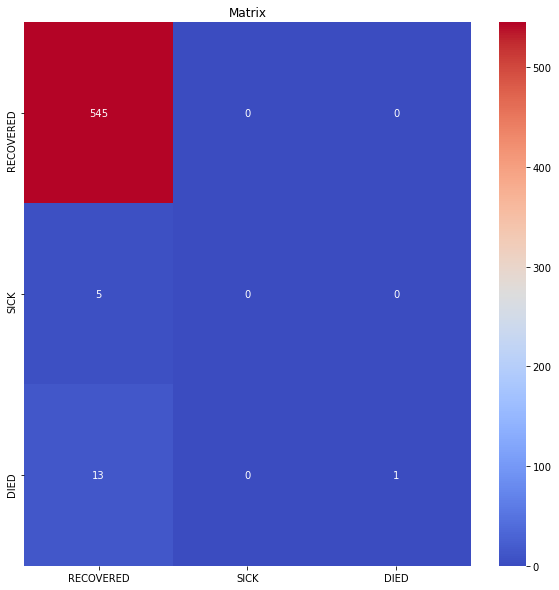

In [30]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="coolwarm",fmt='g')
ax.xaxis.set_label_position("top")

xStats = c1['HealthStatus'].map({1:'RECOVERED',2:'SICK',3:'DIED'}).unique()
yStats = c1['HealthStatus'].map({1:'RECOVERED',2:'SICK',3:'DIED'}).unique()

ax.set_xticklabels(xStats)
ax.set_yticklabels(yStats)
plt.title('Matrix')
plt.show()

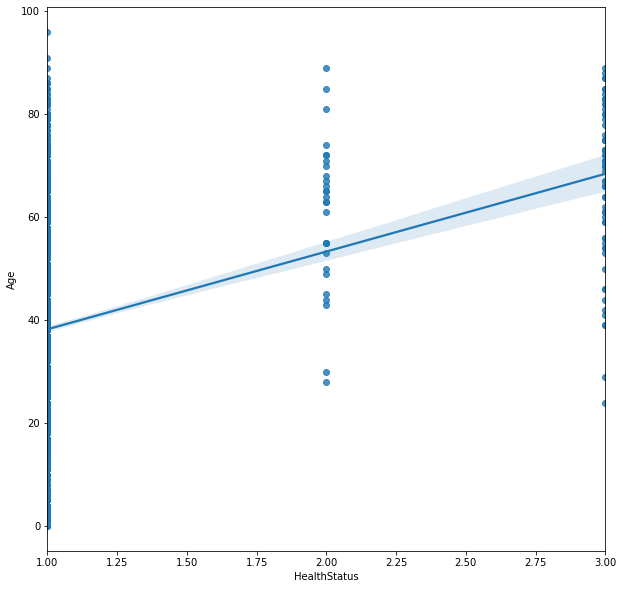

In [42]:
plt.figure(figsize=(10,10))
sns.regplot(x=c2['HealthStatus'],y=c2['Age'],data=c2)

In [32]:
c1['Age']

0       74.0
1       24.0
2       45.0
3       20.0
4       33.0
        ... 
8364    22.0
8365    16.0
8366    34.0
8367    12.0
8368    46.0
Name: Age, Length: 8369, dtype: float64

In [84]:
def predC2(x,y):
    y_pred = clf.predict([[x,y]])
    hStat = ''

    if y_pred[0] == 1:
        hStat = 'Recovered - most likely not sick'
        plt.title('RECOVERED')
    elif y_pred[0] == 2:
        hStat = 'Sick - has symptoms or is probably ill from COVID'
        plt.title('SICK')
    elif y_pred[0] == 3:
        hStat = 'Dead'

    return hStat

In [85]:
#Makati City
age = input('Enter Age: ')
qs = input('Enter Quarantine Status [y/n]: ')
qs = userInput.lower()
qStat = -1

if qs == 'y':
    qStat = 0
    
elif qs == 'n':
    qStat = 1

predC2(float(int(age)),float(qStat))

'Dead'